## Model simuleren: populatiemodel

$$\frac{dS}{dt}= -\beta SI$$
$$\frac{dI}{dt}= \beta SI - \gamma I$$
$$\frac{dR}{dt}= \gamma I$$

In [1]:
%matplotlib inline

In [6]:
# Importeren van functionaliteiten
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Image
from ipywidgets import interact, fixed, ToggleButtons, IntSlider, FloatSlider
%load_ext autoreload
%autoreload 1
%aimport corona
#from populatie import populatie_model   # Importeren van de populatie functies

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model simuleren

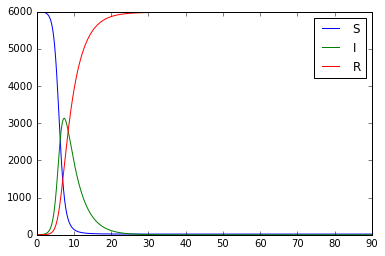

In [3]:
model = corona.populatie_model(np.arange(0., 90, 0.1), 6000, 1, 0, 0.0002856, 0.2981930)

## Impact parameters (deel 1)

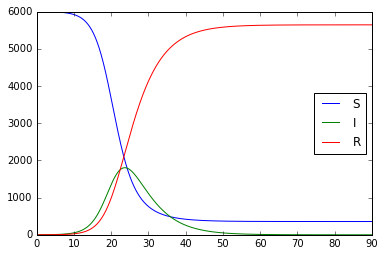

In [13]:
interact(corona.populatie_model, tijdstappen=fixed(np.arange(0., 90, 0.1)), S_0=fixed(6000), 
         I_0=fixed(1), R_0=fixed(0),
         beta=FloatSlider(value=1e-4, min=1e-5, max=5e-4, step=1e-5,
                          continuous_update=False, readout_format='.2e'),
         gamma=FloatSlider(value=0.2, min=0, max=0.4, step=0.01,
                          continuous_update=False, readout_format='.2e'),
         returnDataFrame=fixed(False));

sensitivity

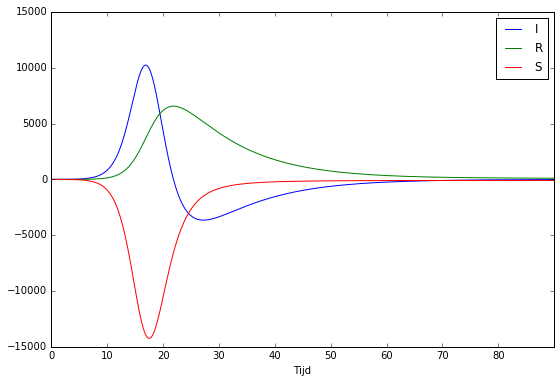

In [5]:
interact(corona.sensitiviteit,
    tijdstappen=fixed(np.arange(0., 90, 0.1)), # tijdstappen
    init=fixed([6000, 1, 0]), # initiële condities
    varnames=fixed(['S','I', 'R']), # namen variabelen
    f=fixed(corona.model_afgeleiden), # naam functie afgeleiden
    parameternaam=ToggleButtons(options=['beta', 'gamma']),
    log_perturbatie = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    soort=ToggleButtons(options=[
            'absolute sensitiviteit', 'relatieve sensitiviteit parameter',
            'relatieve sensitiviteit variabele','relatieve totale sensitiviteit']),
    # vanaf hier: functie specifieke parameters
    beta=fixed(0.0001), gamma=fixed(0.1))